# MODS207: Projects Ver2

This code is being modified after Lauries' suggestions. This included:

1. Add robust standard errors
2. Modify all code from version 1
3. Add entity fixed effects by countries
4. Solve the problem of the coefficients of time fixed effects
5. Propose a new method to compare regions

## Packages importing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import math
import statsmodels.api as sm
import seaborn as sns

## Data processing

### Check control variables from MODS206

In [3]:
data_206 = pd.read_csv('./final_data_mod206.csv')
data_206

,dates,country,urbanization,gas_price,gdp,num_car,oil_consumption,industry,services,intercept,...,is_UK,gas_price^2,gas_price^3,is_USA,is_USA X gas_price,is_USA X gas_price^2,is_USA X gas_price^3,oil_consumption X gas_price,oil_consumption X gas_price^2,oil_consumption X gas_price^3
0,1992,US,82.789,0.287155,25418.990776,194.42735,16969.0,23.132100,71.809000,1.0,...,0,0.082458,0.023678,1,0.287155,0.082458,0.023678,4872.735846,1399.231223,401.796461
1,1993,US,83.654,0.281872,26387.293734,198.04134,17161.0,23.132100,71.809000,1.0,...,0,0.079452,0.022395,1,0.281872,0.079452,0.022395,4837.200462,1363.469979,384.323618
2,1994,US,84.485,0.283985,27694.853416,201.80192,17635.0,23.132100,71.809000,1.0,...,0,0.080648,0.022903,1,0.283985,0.080648,0.022903,5008.077064,1422.219216,403.889052
3,1995,US,85.280,0.293495,28690.875701,205.42721,17635.0,23.132100,71.809000,1.0,...,0,0.086139,0.025282,1,0.293495,0.086139,0.025282,5175.789413,1519.069807,445.839831
4,1996,US,86.043,0.316742,29967.712718,210.44125,18245.0,23.132100,71.809000,1.0,...,0,0.100326,0.031777,1,0.316742,0.100326,0.031777,5778.965819,1830.443734,579.779215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2015,United Kingdom,82.626,0.708271,44974.831877,31.20000,1552.0,18.141621,70.408410,1.0,...,1,0.501648,0.355302,0,0.000000,0.000000,0.000000,1099.236284,778.556964,551.429165
108,2016,United Kingdom,82.886,0.476838,41064.133432,31.80000,1597.0,17.581142,70.922420,1.0,...,1,0.227374,0.108421,0,0.000000,0.000000,0.000000,761.510082,363.116847,173.147865
109,2017,United Kingdom,83.143,0.669715,40361.417383,32.20000,1610.0,17.562620,70.934180,1.0,...,1,0.448518,0.300379,0,0.000000,0.000000,0.000000,1078.240995,722.114065,483.610551
110,2018,United Kingdom,83.398,0.741141,43043.227816,32.50000,1584.0,17.518831,71.043378,1.0,...,1,0.549289,0.407101,0,0.000000,0.000000,0.000000,1173.966797,870.074521,644.847600


In [4]:
model19 = sm.OLS(data_206['urbanization'], data_206[[
                 'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_USA', 'is_USA X gas_price', 'is_USA X gas_price^2',
                 'is_USA X gas_price^3', 'oil_consumption X gas_price', 'oil_consumption X gas_price^2',
                 'oil_consumption X gas_price^3']])
res19 = model19.fit()
print(res19.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     250.5
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.09e-70
Time:                        07:47:32   Log-Likelihood:                -98.861
No. Observations:                 112   AIC:                             233.7
Df Residuals:                      94   BIC:                             282.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

In [5]:
model192 = sm.OLS(data_206['urbanization'], data_206[[
                'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'num_car', 'oil_consumption', 
                'is_Canada', 'is_France', 'is_USA', 'is_USA X gas_price', 'is_USA X gas_price^2',
                 'is_USA X gas_price^3', 'oil_consumption X gas_price', 'oil_consumption X gas_price^2',
                 'oil_consumption X gas_price^3']])
res192 = model192.fit()
print(res192.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     164.7
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.85e-61
Time:                        07:47:32   Log-Likelihood:                -129.63
No. Observations:                 112   AIC:                             291.3
Df Residuals:                      96   BIC:                             334.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

In [6]:
model193 = sm.OLS(data_206['urbanization'], data_206[[
                'intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp', 'oil_consumption', 'industry',
                 'services', 'is_Canada', 'is_France', 'is_USA', 'is_USA X gas_price', 'is_USA X gas_price^2',
                 'is_USA X gas_price^3', 'oil_consumption X gas_price', 'oil_consumption X gas_price^2',
                 'oil_consumption X gas_price^3']])
res193 = model193.fit()
print(res193.summary())

                            OLS Regression Results                            
Dep. Variable:           urbanization   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     248.9
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           4.56e-70
Time:                        07:47:33   Log-Likelihood:                -103.11
No. Observations:                 112   AIC:                             240.2
Df Residuals:                      95   BIC:                             286.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

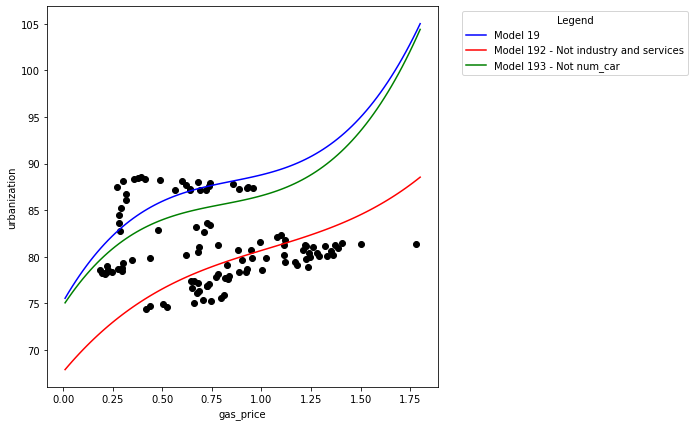

In [7]:
params19 = res19.params
params192 = res192.params
params193 = res193.params

x42 = np.linspace(0.01, 1.8, 100)
y19 = params19['intercept'] + params19['gas_price']*x42 + \
    params19['gas_price^2']*x42**2 + params19['gas_price^3']*x42**3
y192 = params192['intercept'] + params192['gas_price']*x42 + \
    params192['gas_price^2']*x42**2 + params192['gas_price^3']*x42**3
y193 = params193['intercept'] + params193['gas_price']*x42 + \
    params193['gas_price^2']*x42**2 + params193['gas_price^3']*x42**3

plt.figure(figsize=(7, 7))
plt.scatter(data_206['gas_price'],
            data_206['urbanization'], color='black')
p19, = plt.plot(x42, y19, label='Model 19', color='blue')
p192, = plt.plot(x42, y192, label='Model 192 - Not industry and services', color='red')
p193, = plt.plot(x42, y193, label='Model 193 - Not num_car', color='green')

plt.xlabel('gas_price')
plt.ylabel('urbanization')
#plt.ylim(60, 95)
# plt.legend()
plt.legend(handles=[p19, p192, p193], title='Legend', bbox_to_anchor=(
    1.05, 1), loc='upper left')

**We should keep industry and services, remove number of cars, because the remove of numbers of cars did not change the regression line much, but the remove of industry and services did.**

### Working with new data

#### Import data, handle missing data

In [8]:
new_data = pd.read_csv('./all_data.csv', decimal=',').drop(columns=['oil_import', 'oil_export'])
new_data

,year,gas_price,country,urbanisation,gdp_per_capita,oil_consumption_EJ,oil_production,service,industry
0,1991,0.15,Algeria,52.87100,4708.23,110.627875,681.500,NaN,NaN
1,1992,0.20,Algeria,53.65700,4850.22,111.292745,656.045,NaN,NaN
2,1995,0.40,Algeria,55.99700,5142.38,103.142365,648.031,NaN,NaN
3,1998,0.31,Algeria,58.31300,6069.78,100.658829,712.758,NaN,NaN
4,2000,0.27,Algeria,59.91900,6834.55,103.132562,775.472,34.208598,55.020634
...,...,...,...,...,...,...,...,...,...
833,2014,1.04,Vietnam,33.11500,5455.00,226.911487,184.071,39.036394,33.214394
834,2016,0.80,Vietnam,34.51000,6062.00,264.637019,180.100,40.924678,32.715042
835,2000,0.60,World,46.68932,9914.57,42897.190890,41864.212,60.190784,29.027775
836,2010,1.22,World,51.64628,13179.50,48087.136180,46251.552,63.240427,27.187720


In [9]:
new_data.isnull().sum()

year                   0
gas_price              0
country                0
urbanisation           0
gdp_per_capita         0
oil_consumption_EJ     0
oil_production         0
service               27
industry              24
dtype: int64

In [10]:
new_data_1 = new_data[new_data['service'].isnull() != True]
new_data_1 = new_data_1[new_data_1['industry'].isnull() != True]
new_data_1

,year,gas_price,country,urbanisation,gdp_per_capita,oil_consumption_EJ,oil_production,service,industry
4,2000,0.27,Algeria,59.91900,6834.55,103.132562,775.472,34.208598,55.020634
5,2002,0.22,Algeria,61.50100,7814.84,118.397324,823.159,37.236052,49.989807
6,2004,0.32,Algeria,63.06100,9182.29,128.746933,970.121,34.604855,52.979720
7,2006,0.32,Algeria,64.59300,10385.78,139.845833,1000.902,31.843550,59.480792
8,2008,0.34,Algeria,66.09700,11475.00,169.916032,984.170,34.208813,59.165772
...,...,...,...,...,...,...,...,...,...
833,2014,1.04,Vietnam,33.11500,5455.00,226.911487,184.071,39.036394,33.214394
834,2016,0.80,Vietnam,34.51000,6062.00,264.637019,180.100,40.924678,32.715042
835,2000,0.60,World,46.68932,9914.57,42897.190890,41864.212,60.190784,29.027775
836,2010,1.22,World,51.64628,13179.50,48087.136180,46251.552,63.240427,27.187720


In [11]:
new_data_1.isnull().sum()

year                  0
gas_price             0
country               0
urbanisation          0
gdp_per_capita        0
oil_consumption_EJ    0
oil_production        0
service               0
industry              0
dtype: int64

In [12]:
new_data_1 = new_data_1[new_data_1['country'] != 'World']
new_data_1

,year,gas_price,country,urbanisation,gdp_per_capita,oil_consumption_EJ,oil_production,service,industry
4,2000,0.27,Algeria,59.919,6834.55,103.132562,775.472,34.208598,55.020634
5,2002,0.22,Algeria,61.501,7814.84,118.397324,823.159,37.236052,49.989807
6,2004,0.32,Algeria,63.061,9182.29,128.746933,970.121,34.604855,52.979720
7,2006,0.32,Algeria,64.593,10385.78,139.845833,1000.902,31.843550,59.480792
8,2008,0.34,Algeria,66.097,11475.00,169.916032,984.170,34.208813,59.165772
...,...,...,...,...,...,...,...,...,...
830,2008,0.80,Vietnam,29.128,4200.24,170.074552,176.071,42.509160,37.077696
831,2010,0.88,Vietnam,30.417,4571.85,185.617739,177.139,36.942472,32.131894
832,2012,1.15,Vietnam,31.752,4984.00,206.374985,197.322,37.266806,33.557793
833,2014,1.04,Vietnam,33.115,5455.00,226.911487,184.071,39.036394,33.214394


In [13]:
data = new_data_1.rename(
    columns={
        'urbanisation': 'urban',
        'gdp_per_capita': 'gdp',
        'oil_consumption_EJ': 'oil_cons',
        'oil_production': 'oil_prod',
        'service': 'ser',
        'industry': 'ind'
    })
data

,year,gas_price,country,urban,gdp,oil_cons,oil_prod,ser,ind
4,2000,0.27,Algeria,59.919,6834.55,103.132562,775.472,34.208598,55.020634
5,2002,0.22,Algeria,61.501,7814.84,118.397324,823.159,37.236052,49.989807
6,2004,0.32,Algeria,63.061,9182.29,128.746933,970.121,34.604855,52.979720
7,2006,0.32,Algeria,64.593,10385.78,139.845833,1000.902,31.843550,59.480792
8,2008,0.34,Algeria,66.097,11475.00,169.916032,984.170,34.208813,59.165772
...,...,...,...,...,...,...,...,...,...
830,2008,0.80,Vietnam,29.128,4200.24,170.074552,176.071,42.509160,37.077696
831,2010,0.88,Vietnam,30.417,4571.85,185.617739,177.139,36.942472,32.131894
832,2012,1.15,Vietnam,31.752,4984.00,206.374985,197.322,37.266806,33.557793
833,2014,1.04,Vietnam,33.115,5455.00,226.911487,184.071,39.036394,33.214394


In [14]:
data.reset_index(inplace=True, drop=True)
data

,year,gas_price,country,urban,gdp,oil_cons,oil_prod,ser,ind
0,2000,0.27,Algeria,59.919,6834.55,103.132562,775.472,34.208598,55.020634
1,2002,0.22,Algeria,61.501,7814.84,118.397324,823.159,37.236052,49.989807
2,2004,0.32,Algeria,63.061,9182.29,128.746933,970.121,34.604855,52.979720
3,2006,0.32,Algeria,64.593,10385.78,139.845833,1000.902,31.843550,59.480792
4,2008,0.34,Algeria,66.097,11475.00,169.916032,984.170,34.208813,59.165772
...,...,...,...,...,...,...,...,...,...
803,2008,0.80,Vietnam,29.128,4200.24,170.074552,176.071,42.509160,37.077696
804,2010,0.88,Vietnam,30.417,4571.85,185.617739,177.139,36.942472,32.131894
805,2012,1.15,Vietnam,31.752,4984.00,206.374985,197.322,37.266806,33.557793
806,2014,1.04,Vietnam,33.115,5455.00,226.911487,184.071,39.036394,33.214394


#### Add intercept, rate of urbanization

In [15]:
data['intercept'] = np.ones((len(data),1))
data[data['country'] == 'Algeria']

,year,gas_price,country,urban,gdp,oil_cons,oil_prod,ser,ind,intercept
0,2000,0.27,Algeria,59.919,6834.55,103.132562,775.472,34.208598,55.020634,1.0
1,2002,0.22,Algeria,61.501,7814.84,118.397324,823.159,37.236052,49.989807,1.0
2,2004,0.32,Algeria,63.061,9182.29,128.746933,970.121,34.604855,52.979720,1.0
3,2006,0.32,Algeria,64.593,10385.78,139.845833,1000.902,31.843550,59.480792,1.0
4,2008,0.34,Algeria,66.097,11475.00,169.916032,984.170,34.208813,59.165772,1.0
5,2010,0.32,Algeria,67.540,12587.74,180.048999,856.610,40.253113,51.084541,1.0
6,2012,0.29,Algeria,68.915,13379.00,204.395431,780.407,41.437807,48.321729,1.0
7,2014,0.27,Algeria,70.221,13744.00,221.925330,798.508,44.987184,42.822615,1.0
8,2016,0.28,Algeria,71.459,14331.00,229.441223,794.398,50.666529,35.360128,1.0


In [16]:
data['urban_rate'] = 0
urban_rate = []
rate = 0
for i,rows in data.iterrows():
    if(i == (len(data) - 1)):
        urban_rate.append(rate)
        print(i)
        break
    elif(data.iloc[i+1]['country'] == rows['country']):
        rate = (data.iloc[i+1]['urban'] - rows['urban'])/(data.iloc[i+1]['year'] - rows['year'])
        urban_rate.append(rate)
    elif(data.iloc[i+1]['country'] != rows['country']):
        urban_rate.append(rate)
    else:
        urban_rate.append(0)

807


In [17]:
len(urban_rate)

808

In [18]:
data['urban_rate'] = np.array(urban_rate).reshape((len(data),1))

In [19]:
data

,year,gas_price,country,urban,gdp,oil_cons,oil_prod,ser,ind,intercept,urban_rate
0,2000,0.27,Algeria,59.919,6834.55,103.132562,775.472,34.208598,55.020634,1.0,0.7910
1,2002,0.22,Algeria,61.501,7814.84,118.397324,823.159,37.236052,49.989807,1.0,0.7800
2,2004,0.32,Algeria,63.061,9182.29,128.746933,970.121,34.604855,52.979720,1.0,0.7660
3,2006,0.32,Algeria,64.593,10385.78,139.845833,1000.902,31.843550,59.480792,1.0,0.7520
4,2008,0.34,Algeria,66.097,11475.00,169.916032,984.170,34.208813,59.165772,1.0,0.7215
...,...,...,...,...,...,...,...,...,...,...,...
803,2008,0.80,Vietnam,29.128,4200.24,170.074552,176.071,42.509160,37.077696,1.0,0.6445
804,2010,0.88,Vietnam,30.417,4571.85,185.617739,177.139,36.942472,32.131894,1.0,0.6675
805,2012,1.15,Vietnam,31.752,4984.00,206.374985,197.322,37.266806,33.557793,1.0,0.6815
806,2014,1.04,Vietnam,33.115,5455.00,226.911487,184.071,39.036394,33.214394,1.0,0.6975


#### Split data by regions

In [20]:
continent = pd.read_csv('./continent.csv')
continent

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


In [21]:
country = []
for i,row in continent.iterrows():
    try:
        #continent.iloc[i]['Country_Name'] = row['Country_Name'].split(',')[0]
        row['Country_Name'].split(',')[1]
        country.append(row['Country_Name'].split(',')[0])
    except:
        country.append('nan')
        continue

In [22]:
country

['Afghanistan',
 'Albania',
 'nan',
 'Algeria',
 'nan',
 'Andorra',
 'Angola',
 'nan',
 'Azerbaijan',
 'Azerbaijan',
 'Argentina',
 'Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Armenia',
 'Armenia',
 'nan',
 'Belgium',
 'nan',
 'Bhutan',
 'Bolivia',
 'nan',
 'Botswana',
 'nan',
 'Brazil',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'Bulgaria',
 'Myanmar',
 'Burundi',
 'Belarus',
 'Cambodia',
 'Cameroon',
 'nan',
 'Cape Verde',
 'nan',
 'nan',
 'Sri Lanka',
 'Chad',
 'Chile',
 'China',
 'nan',
 'nan',
 'nan',
 'Colombia',
 'Comoros',
 'nan',
 'Congo',
 'Congo',
 'nan',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Cyprus',
 'nan',
 'Benin',
 'Denmark',
 'Dominica',
 'nan',
 'Ecuador',
 'El Salvador',
 'Equatorial Guinea',
 'Ethiopia',
 'Eritrea',
 'Estonia',
 'nan',
 'nan',
 'nan',
 'Fiji',
 'Finland',
 'nan',
 'France',
 'nan',
 'nan',
 'nan',
 'Djibouti',
 'Gabon',
 'nan',
 'nan',
 'Gambia',
 'Palestinian Territory',
 'Germany',
 'Ghana',
 'nan',
 'Kiribati',
 'Gr

In [23]:
continent['country_new'] = country

In [24]:
continent_new = continent[['Continent_Name', 'country_new']]
continent_new = continent_new[continent_new['country_new'] != 'nan']
continent_new.reset_index(inplace=True, drop=True)

In [25]:
continent_new

,Continent_Name,country_new
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
165,South America,Uruguay
166,Asia,Uzbekistan
167,South America,Venezuela
168,Oceania,Samoa


In [26]:
continent_new['Continent_Name'].drop_duplicates()

0              Asia
1            Europe
2            Africa
7     South America
8           Oceania
10    North America
Name: Continent_Name, dtype: object

In [27]:
continent_dict = {'Asia': 0, 'Europe': 1, 'Africa': 2, 'South America': 3, 'Oceania': 4, 'North America': 5}
continent_new['Continent_code'] = continent_new['Continent_Name'].replace(continent_dict)
continent_new

,Continent_Name,country_new,Continent_code
0,Asia,Afghanistan,0
1,Europe,Albania,1
2,Africa,Algeria,2
3,Europe,Andorra,1
4,Africa,Angola,2
...,...,...,...
165,South America,Uruguay,3
166,Asia,Uzbekistan,0
167,South America,Venezuela,3
168,Oceania,Samoa,4


In [28]:
data_dict = dict(zip(continent_new['country_new'], continent_new['Continent_code']))
data['region'] = data['country'].replace(data_dict)
#data['region'] = data['region'].astype(int)
data['region'].drop_duplicates()

0                         2
9                         3
21                        4
31                        1
42                        0
107                  Canada
173          Czech Republic
332                 Ireland
365                   Japan
424                Malaysia
436                       5
472             New Zealand
483         North Macedonia
574                 Romania
608                Slovakia
642             South Korea
728            Turkmenistan
735                 Ukraine
745    United Arab Emirates
755          United Kingdom
766           United States
Name: region, dtype: object

In [29]:
region = data['region']
region[region == 'Canada'] = 5
region[region== 'Czech Republic'] = 1
region[region == 'Ireland'] = 1
region[region == 'Japan'] = 0
region[region == 'Malaysia'] = 0
region[region == 'New Zealand'] = 4
region[region == 'North Macedonia'] = 1
region[region == 'Romania'] = 1
region[region == 'Slovakia'] = 1
region[region == 'South Korea'] = 0
region[region == 'Turkmenistan'] = 0
region[region == 'Ukraine'] = 0
region[region == 'United Arab Emirates'] = 0
region[region == 'United Kingdom'] = 1
region[region == 'United States'] = 5
# data['region'].drop_duplicates()
region

<ipython-input-29-f8e613575539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region[region == 'Canada'] = 5
<ipython-input-29-f8e613575539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region[region== 'Czech Republic'] = 1
<ipython-input-29-f8e613575539>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region[region == 'Ireland'] = 1
<ipython-input-29-f8e613575539>:5: SettingWithCopyWarning: 
A value is trying to be set on a co

0      2
1      2
2      2
3      2
4      2
      ..
803    0
804    0
805    0
806    0
807    0
Name: region, Length: 808, dtype: object

In [30]:
region.drop_duplicates()

0      2
9      3
21     4
31     1
42     0
107    5
Name: region, dtype: object

In [31]:
asia = data[data['region'] == 0]
europe = data[data['region'] == 1]
africa = data[data['region'] == 2]
SA = data[data['region'] == 3]
oceania = data[data['region'] == 4]
NA = data[data['region'] == 5]

In [32]:
asia

,year,gas_price,country,urban,gdp,oil_cons,oil_prod,ser,ind,intercept,urban_rate,region
42,1998,0.46,Azerbaijan,51.278,3550.36,69.873549,132.936,43.341278,34.956112,1.0,0.0540,0
43,2000,0.39,Azerbaijan,51.386,4214.89,74.266365,163.357,35.785592,42.538310,1.0,0.2005,0
44,2002,0.37,Azerbaijan,51.787,4880.40,43.519501,178.045,32.455258,46.154227,1.0,0.2010,0
45,2004,0.41,Azerbaijan,52.189,5971.47,54.573148,179.496,31.798785,50.769032,1.0,0.2000,0
46,2006,0.46,Azerbaijan,52.589,10160.35,57.112626,374.663,23.509831,64.958232,1.0,0.2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
803,2008,0.80,Vietnam,29.128,4200.24,170.074552,176.071,42.509160,37.077696,1.0,0.6445,0
804,2010,0.88,Vietnam,30.417,4571.85,185.617739,177.139,36.942472,32.131894,1.0,0.6675,0
805,2012,1.15,Vietnam,31.752,4984.00,206.374985,197.322,37.266806,33.557793,1.0,0.6815,0
806,2014,1.04,Vietnam,33.115,5455.00,226.911487,184.071,39.036394,33.214394,1.0,0.6975,0


In [33]:
data.to_csv('./cleaned_207.csv', index=False)

In [34]:
data['region'] = data['region'].astype(int)

## Regressions

### Simple regressions


*NewOnVersion2 - 1: We will not include region as a control variable anymore because it does not make sense. We will include it later by considering the entity fixed effects*

*NewOnVersion2 - 2: We now use the robust SE by applying clustered SE on the group of coutrnies. By doing this way, we will not omit the autocorrelation within a country. (Reference link: https://www.vincentgregoire.com/standard-errors-in-python/)*

#### Urban

In [35]:
model1 = sm.OLS(data['urban'], data[['intercept', 'gas_price',
                                     'gdp', 'oil_cons', 'oil_prod', 'ind', 'ser']])
res1 = model1.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     18.78
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           3.27e-13
Time:                        07:47:40   Log-Likelihood:                -3238.8
No. Observations:                 808   AIC:                             6492.
Df Residuals:                     801   BIC:                             6524.
Df Model:                           6                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.8069     18.271     -0.373      0.7

In [88]:
model1_2 = sm.OLS(data['urban'], data[['intercept', 'gas_price', 'oil_cons', 'oil_prod', 'ser', 'ind'
                                     ]])
res1_2 = model1_2.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res1_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     18.16
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           9.16e-12
Time:                        09:00:14   Log-Likelihood:                -3290.8
No. Observations:                 808   AIC:                             6594.
Df Residuals:                     802   BIC:                             6622.
Df Model:                           5                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -46.7920     18.980     -2.465      0.0

#### Urban_rate

In [36]:
model2= sm.OLS(data['urban_rate'], data[['intercept', 'gas_price', 'gdp', 'oil_cons', 'oil_prod', 'ind', 'ser']])
res2 = model2.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     1.920
Date:                Sun, 20 Jun 2021   Prob (F-statistic):             0.0885
Time:                        07:47:40   Log-Likelihood:                -145.68
No. Observations:                 808   AIC:                             305.4
Df Residuals:                     801   BIC:                             338.2
Df Model:                           6                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1774      0.311      0.570      0.5

### Fixed effects

#### Entity fixed effects

In [37]:
data['asia'] = data['region'] == 0
data['asia'] = data['asia'].astype(int)
data['europe'] = data['region'] == 1
data['europe'] = data['europe'].astype(int)
data['NA'] = data['region'] == 5
data['NA'] = data['NA'].astype(int)
data['africa'] = data['region'] == 2
data['africa'] = data['africa'].astype(int)
data['oceania'] = data['region'] == 4
data['oceania'] = data['oceania'].astype(int)
data

,year,gas_price,country,urban,gdp,oil_cons,oil_prod,ser,ind,intercept,urban_rate,region,asia,europe,NA,africa,oceania
0,2000,0.27,Algeria,59.919,6834.55,103.132562,775.472,34.208598,55.020634,1.0,0.7910,2,0,0,0,1,0
1,2002,0.22,Algeria,61.501,7814.84,118.397324,823.159,37.236052,49.989807,1.0,0.7800,2,0,0,0,1,0
2,2004,0.32,Algeria,63.061,9182.29,128.746933,970.121,34.604855,52.979720,1.0,0.7660,2,0,0,0,1,0
3,2006,0.32,Algeria,64.593,10385.78,139.845833,1000.902,31.843550,59.480792,1.0,0.7520,2,0,0,0,1,0
4,2008,0.34,Algeria,66.097,11475.00,169.916032,984.170,34.208813,59.165772,1.0,0.7215,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2008,0.80,Vietnam,29.128,4200.24,170.074552,176.071,42.509160,37.077696,1.0,0.6445,0,1,0,0,0,0
804,2010,0.88,Vietnam,30.417,4571.85,185.617739,177.139,36.942472,32.131894,1.0,0.6675,0,1,0,0,0,0
805,2012,1.15,Vietnam,31.752,4984.00,206.374985,197.322,37.266806,33.557793,1.0,0.6815,0,1,0,0,0,0
806,2014,1.04,Vietnam,33.115,5455.00,226.911487,184.071,39.036394,33.214394,1.0,0.6975,0,1,0,0,0,0


In [38]:
model3= sm.OLS(data['urban'], data[['intercept', 'gas_price', 'gdp', 'oil_cons', 'oil_prod', 'ind', 'ser',
                                   'asia', 'europe', 'africa', 'NA', 'oceania']])
res3 = model3.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     15.02
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           6.80e-15
Time:                        07:47:40   Log-Likelihood:                -3131.8
No. Observations:                 808   AIC:                             6288.
Df Residuals:                     796   BIC:                             6344.
Df Model:                          11                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.2079     19.153      0.637      0.5

In [39]:
model4= sm.OLS(data['urban_rate'], data[['intercept', 'gas_price', 'gdp', 'oil_cons', 'oil_prod', 'ind', 'ser',
                                   'asia', 'europe', 'africa', 'NA', 'oceania']])
res4 = model4.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     5.423
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.79e-06
Time:                        07:47:40   Log-Likelihood:                -123.05
No. Observations:                 808   AIC:                             270.1
Df Residuals:                     796   BIC:                             326.4
Df Model:                          11                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1098      0.307      0.357      0.7

#### Time fixed effects

In [40]:
data['year'].drop_duplicates()

0      2000
1      2002
2      2004
3      2006
4      2008
5      2010
6      2012
7      2014
8      2016
9      1992
10     1995
11     1998
207    1991
Name: year, dtype: int64

In [41]:
year = data['year']
le_2000 = (year < 2000).astype(int)
le_2010 = ((year < 2010) & (year >= 2000)).astype(int)
le_2016 = (year >= 2010).astype(int)

In [42]:
data['le_2000'] = le_2000
data['le_2010'] = le_2010
data['le_2016'] = le_2016
data

,year,gas_price,country,urban,gdp,oil_cons,oil_prod,ser,ind,intercept,urban_rate,region,asia,europe,NA,africa,oceania,le_2000,le_2010,le_2016
0,2000,0.27,Algeria,59.919,6834.55,103.132562,775.472,34.208598,55.020634,1.0,0.7910,2,0,0,0,1,0,0,1,0
1,2002,0.22,Algeria,61.501,7814.84,118.397324,823.159,37.236052,49.989807,1.0,0.7800,2,0,0,0,1,0,0,1,0
2,2004,0.32,Algeria,63.061,9182.29,128.746933,970.121,34.604855,52.979720,1.0,0.7660,2,0,0,0,1,0,0,1,0
3,2006,0.32,Algeria,64.593,10385.78,139.845833,1000.902,31.843550,59.480792,1.0,0.7520,2,0,0,0,1,0,0,1,0
4,2008,0.34,Algeria,66.097,11475.00,169.916032,984.170,34.208813,59.165772,1.0,0.7215,2,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2008,0.80,Vietnam,29.128,4200.24,170.074552,176.071,42.509160,37.077696,1.0,0.6445,0,1,0,0,0,0,0,1,0
804,2010,0.88,Vietnam,30.417,4571.85,185.617739,177.139,36.942472,32.131894,1.0,0.6675,0,1,0,0,0,0,0,0,1
805,2012,1.15,Vietnam,31.752,4984.00,206.374985,197.322,37.266806,33.557793,1.0,0.6815,0,1,0,0,0,0,0,0,1
806,2014,1.04,Vietnam,33.115,5455.00,226.911487,184.071,39.036394,33.214394,1.0,0.6975,0,1,0,0,0,0,0,0,1


In [100]:
model5= sm.OLS(data['urban'], data[['intercept', 'gas_price', 'gdp', 'oil_cons', 'oil_prod', 'ind', 'ser',
                                   'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res5 = model5.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     15.78
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.64e-16
Time:                        09:14:43   Log-Likelihood:                -3127.2
No. Observations:                 808   AIC:                             6282.
Df Residuals:                     794   BIC:                             6348.
Df Model:                          13                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.0176     20.144      0.398      0.6

In [44]:
model6= sm.OLS(data['urban_rate'], data[['intercept', 'gas_price', 'gdp', 'oil_cons', 'oil_prod', 'ind', 'ser',
                                   'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res6 = model6.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     4.577
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.04e-05
Time:                        07:47:41   Log-Likelihood:                -121.73
No. Observations:                 808   AIC:                             271.5
Df Residuals:                     794   BIC:                             337.2
Df Model:                          13                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0705      0.308      0.229      0.8

#### Hypothesis tests for fixed effects

*NewOnVersion2 - 3: We did not consider the hypothesis tests for fixed effects anymore, because in any cases, we still keep the fixed effects on our models*

##### Time fixed effects = 0

In [45]:
# With urban
u3 = res3.resid
SSR3 = u3.T@u3
u5 = res5.resid
SSR5 = u5.T@u5

In [46]:
from scipy.stats import f
n = len(data)
k5 = len(res5.params)
F53 = ((SSR3 - SSR5)/2)/(SSR5/(n - k5))
pvalue53 = f.sf(F53, 2, n-k5)
print('F53: {}, p-value: {}'.format(F53, pvalue53))

F53: 4.520386522759975, p-value: 0.011166413047738678


In [47]:
# With urban_rate
u4 = res4.resid
SSR4 = u4.T@u4
u6 = res6.resid
SSR6 = u6.T@u6

In [48]:
n = len(data)
k6 = len(res6.params)
F64 = ((SSR4 - SSR6)/2)/(SSR6/(n - k6))
pvalue64 = f.sf(F64, 2, n-k6)
print('F64: {}, p-value: {}'.format(F64, pvalue64))

F64: 1.2984632220170116, p-value: 0.2735298816577815


**So, based on p-values, for urban, we will keep the time fixed effects, but we will not keep for urban_rate model (at 5%)**

##### All fixed effects = 0

In [49]:
# With urban
u1 = res1.resid
SSR1 = u1.T@u1

In [50]:
n = len(data)
k5 = len(res5.params)
F51 = ((SSR1 - SSR5)/2)/(SSR5/(n - k5))
pvalue51 = f.sf(F51, 7, n-k5)
print('F51: {}, p-value: {}'.format(F51, pvalue51))

F51: 126.29989592644974, p-value: 1.8321738725760327e-124


In [51]:
# With urban_rate
u2 = res2.resid
SSR2 = u2.T@u2

In [52]:
n = len(data)
k6 = len(res6.params)
F62 = ((SSR2 - SSR6)/2)/(SSR6/(n - k6))
pvalue62 = f.sf(F62, 2, n-k6)
print('F62: {}, p-value: {}'.format(F62, pvalue62))

F62: 24.252865977385337, p-value: 5.974648400438607e-11


**We keep entity fixed effects for both urban and urban_rate model, because p-values are both very small compared to 0.**

#### Explain the inappropriate coefficients after including time fixed effects

Problem: The urbanization of years before 2010 were expected to smaller than the urbanization after 2010. In other words, when taking the years between 2010 and 2016 as a base, the coefficients of le_2000 and le_2010 in Model 5 should be negative, but they are positive.

Explanation: 

*NewOnVersion2 - 4: Explain the coefficients of time fixed effects.*

In [53]:
print(len(data[data['le_2000'] == 1]))
print(len(data[data['le_2010'] == 1]))
print(len(data[data['le_2016'] == 1]))

148
365
295


In [54]:
years = range(1990, 2020)
poor = data[data['gdp'] < 5000]
average = data[(data['gdp'] < 60000) & ((data['gdp'] > 5000))]
rich = data[data['gdp'] > 60000]

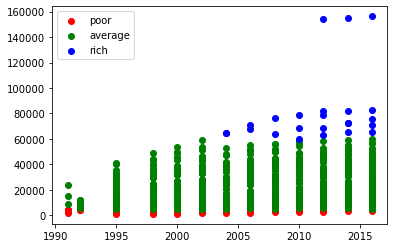

In [55]:
plt.scatter(poor['year'], poor['gdp'], color='red', label ='poor')
plt.scatter(average['year'], average['gdp'], color='green', label ='average')
plt.scatter(rich['year'], rich['gdp'], color='blue', label ='rich')
plt.legend()

In [56]:
data.groupby('year')['urban'].mean()

year
1991    48.980222
1992    66.119100
1995    64.003414
1998    65.404197
2000    66.238671
2002    66.763479
2004    67.306288
2006    67.860959
2008    68.392452
2010    69.535149
2012    70.723055
2014    71.194203
2016    71.206122
Name: urban, dtype: float64

In [57]:
data.groupby('year')['gdp'].mean()

year
1991     7780.951111
1992     7585.282000
1995    15746.131034
1998    18162.431690
2000    19743.352055
2002    20696.917397
2004    22399.129041
2006    24432.271781
2008    25912.148630
2010    26207.262297
2012    29329.561644
2014    29743.135135
2016    30544.162162
Name: gdp, dtype: float64

#### Include entity fixed effects by countries

*NewOnVersion2 - 5: Entity fixed effects at country level*

In [58]:
countries = data['country'].drop_duplicates()
countries

0             Algeria
9           Argentina
21          Australia
31            Austria
42         Azerbaijan
            ...      
755    United Kingdom
766     United States
776        Uzbekistan
787         Venezuela
797           Vietnam
Name: country, Length: 76, dtype: object

In [59]:
data_countries = data['country']
for _,c in countries.iteritems():
    col_name = 'is_' + c
    col = (data_countries == c).astype(int)
    data[col_name] = col
    
data

,year,gas_price,country,urban,gdp,oil_cons,oil_prod,ser,ind,intercept,...,is_Trinidad and Tobago,is_Turkey,is_Turkmenistan,is_Ukraine,is_United Arab Emirates,is_United Kingdom,is_United States,is_Uzbekistan,is_Venezuela,is_Vietnam
0,2000,0.27,Algeria,59.919,6834.55,103.132562,775.472,34.208598,55.020634,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2002,0.22,Algeria,61.501,7814.84,118.397324,823.159,37.236052,49.989807,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2004,0.32,Algeria,63.061,9182.29,128.746933,970.121,34.604855,52.979720,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2006,0.32,Algeria,64.593,10385.78,139.845833,1000.902,31.843550,59.480792,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2008,0.34,Algeria,66.097,11475.00,169.916032,984.170,34.208813,59.165772,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2008,0.80,Vietnam,29.128,4200.24,170.074552,176.071,42.509160,37.077696,1.0,...,0,0,0,0,0,0,0,0,0,1
804,2010,0.88,Vietnam,30.417,4571.85,185.617739,177.139,36.942472,32.131894,1.0,...,0,0,0,0,0,0,0,0,0,1
805,2012,1.15,Vietnam,31.752,4984.00,206.374985,197.322,37.266806,33.557793,1.0,...,0,0,0,0,0,0,0,0,0,1
806,2014,1.04,Vietnam,33.115,5455.00,226.911487,184.071,39.036394,33.214394,1.0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
model7= sm.OLS(data['urban'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region',
                                                'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam']))
res7 = model7.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res7.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     329.4
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           3.57e-55
Time:                        07:47:44   Log-Likelihood:                -1688.6
No. Observations:                 808   AIC:                             3545.
Df Residuals:                     724   BIC:                             3939.
Df Model:                          83                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
gas_price                 

D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 83, but rank is 8
  warnings.warn('covariance of constraints does not have full '


In [61]:
model8= sm.OLS(data['urban_rate'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region',
                                                'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam']))
res8 = model8.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res8.summary())

D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 83, but rank is 8
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     27.86
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.53e-19
Time:                        07:47:44   Log-Likelihood:                 429.08
No. Observations:                 808   AIC:                            -690.2
Df Residuals:                     724   BIC:                            -295.8
Df Model:                          83                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
gas_price                 

### Non linear regressions

*NewOnVersion2 - 6: Do regressions both for region level and country level, also use Cluster SE*

#### Polynommial

In [62]:
data['gas_price^2'] = data['gas_price']**2
data['gas_price^3'] = data['gas_price']**3
data

,year,gas_price,country,urban,gdp,oil_cons,oil_prod,ser,ind,intercept,...,is_Turkmenistan,is_Ukraine,is_United Arab Emirates,is_United Kingdom,is_United States,is_Uzbekistan,is_Venezuela,is_Vietnam,gas_price^2,gas_price^3
0,2000,0.27,Algeria,59.919,6834.55,103.132562,775.472,34.208598,55.020634,1.0,...,0,0,0,0,0,0,0,0,0.0729,0.019683
1,2002,0.22,Algeria,61.501,7814.84,118.397324,823.159,37.236052,49.989807,1.0,...,0,0,0,0,0,0,0,0,0.0484,0.010648
2,2004,0.32,Algeria,63.061,9182.29,128.746933,970.121,34.604855,52.979720,1.0,...,0,0,0,0,0,0,0,0,0.1024,0.032768
3,2006,0.32,Algeria,64.593,10385.78,139.845833,1000.902,31.843550,59.480792,1.0,...,0,0,0,0,0,0,0,0,0.1024,0.032768
4,2008,0.34,Algeria,66.097,11475.00,169.916032,984.170,34.208813,59.165772,1.0,...,0,0,0,0,0,0,0,0,0.1156,0.039304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2008,0.80,Vietnam,29.128,4200.24,170.074552,176.071,42.509160,37.077696,1.0,...,0,0,0,0,0,0,0,1,0.6400,0.512000
804,2010,0.88,Vietnam,30.417,4571.85,185.617739,177.139,36.942472,32.131894,1.0,...,0,0,0,0,0,0,0,1,0.7744,0.681472
805,2012,1.15,Vietnam,31.752,4984.00,206.374985,197.322,37.266806,33.557793,1.0,...,0,0,0,0,0,0,0,1,1.3225,1.520875
806,2014,1.04,Vietnam,33.115,5455.00,226.911487,184.071,39.036394,33.214394,1.0,...,0,0,0,0,0,0,0,1,1.0816,1.124864


##### With urban

In [63]:
# Entity fixed effects at region level
model9= sm.OLS(data['urban'], data[['intercept', 'gas_price', 'gas_price^2', 'gas_price^3','gdp', 
                                    'oil_cons', 'oil_prod', 'ind', 'ser',
                                   'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res9 = model9.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res9.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     13.68
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           8.12e-16
Time:                        07:47:45   Log-Likelihood:                -3126.3
No. Observations:                 808   AIC:                             6285.
Df Residuals:                     792   BIC:                             6360.
Df Model:                          15                                         
Covariance Type:              cluster                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      11.0041     19.742      0.557      

In [64]:
# Entity fixed effects at country level
model11= sm.OLS(data['urban'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region',
                                                'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam']))
res11 = model11.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res11.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     386.0
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           3.15e-60
Time:                        07:47:45   Log-Likelihood:                -1665.9
No. Observations:                 808   AIC:                             3504.
Df Residuals:                     722   BIC:                             3908.
Df Model:                          85                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
gas_price                 

D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 85, but rank is 10
  warnings.warn('covariance of constraints does not have full '


##### Tests for polynominal with urban

In [65]:
# With urban, region level
u5 = res5.resid
SSR5 = u5.T@u5
u9 = res9.resid
SSR9 = u9.T@u9
n = len(data)
k9 = len(res9.params)
F95 = ((SSR5 - SSR9)/2)/(SSR9/(n - k9))
pvalue95 = f.sf(F95, 2, n-k9)
print('F95: {}, p-value: {}'.format(F95, pvalue95))

F95: 0.9102234622050556, p-value: 0.40285484498475743


In [66]:
# With urban, country level
u7 = res7.resid
SSR7 = u7.T@u7
u11 = res11.resid
SSR11 = u11.T@u11
n = len(data)
k11 = len(res11.params)
F117 = ((SSR7 - SSR11)/2)/(SSR11/(n - k11))
pvalue117 = f.sf(F117, 2, n-k11)
print('F117: {}, p-value: {}'.format(F117, pvalue117))

F117: 20.779156076555314, p-value: 1.6822509177857111e-09


**We should not keep polynomial elements in the model of urban at region level. But we will keep polynomial elements at country level.**

##### With urban_rate

In [67]:
model10= sm.OLS(data['urban_rate'], data[['intercept', 'gas_price', 'gas_price^2', 'gas_price^3','gdp', 
                                    'oil_cons', 'oil_prod', 'ind', 'ser',
                                   'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res10 = model10.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res10.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     6.554
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.10e-08
Time:                        07:47:46   Log-Likelihood:                -117.96
No. Observations:                 808   AIC:                             267.9
Df Residuals:                     792   BIC:                             343.0
Df Model:                          15                                         
Covariance Type:              cluster                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0142      0.317      0.045      

In [68]:
# Entity fixed effects at country level
model12= sm.OLS(data['urban_rate'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region',
                                                'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam']))
res12 = model12.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res12.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     43.24
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           4.18e-27
Time:                        07:47:46   Log-Likelihood:                 430.10
No. Observations:                 808   AIC:                            -688.2
Df Residuals:                     722   BIC:                            -284.5
Df Model:                          85                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
gas_price                 

D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 85, but rank is 10
  warnings.warn('covariance of constraints does not have full '


##### Tests for polynomial with urban_rate

In [69]:
# With urban_rate, region level
u6 = res6.resid
SSR6 = u6.T@u6
u10 = res10.resid
SSR10 = u10.T@u10
n = len(data)
k10 = len(res10.params)
F106 = ((SSR6 - SSR10)/2)/(SSR6/(n - k10))
pvalue106 = f.sf(F106, 2, n-k10)
print('F106: {}, p-value: {}'.format(F106, pvalue106))

F106: 3.6794940003295706, p-value: 0.025668136805559353


In [70]:
# With urban_rate, country level
u8 = res8.resid
SSR8 = u8.T@u8
u12 = res12.resid
SSR12 = u12.T@u12
n = len(data)
k12 = len(res12.params)
F128 = ((SSR8 - SSR12)/2)/(SSR8/(n - k12))
pvalue128 = f.sf(F128, 2, n-k12)
print('F128: {}, p-value: {}'.format(F128, pvalue128))

F128: 0.9155449448207684, p-value: 0.4007626464786145


**We should keep polynomial elements in the model of urban_rate, pvalue = 2.6% < 5% at region level. But we will not keep them at country level.**

#### Interactions effects - oil_import

*NewOnVersion2 - 7: add at country level, aslo add some hypothesis tests*

##### With urban, region level

In [71]:
data['oil_import'] = data['oil_cons'] - data['oil_prod']
data

,year,gas_price,country,urban,gdp,oil_cons,oil_prod,ser,ind,intercept,...,is_Ukraine,is_United Arab Emirates,is_United Kingdom,is_United States,is_Uzbekistan,is_Venezuela,is_Vietnam,gas_price^2,gas_price^3,oil_import
0,2000,0.27,Algeria,59.919,6834.55,103.132562,775.472,34.208598,55.020634,1.0,...,0,0,0,0,0,0,0,0.0729,0.019683,-672.339438
1,2002,0.22,Algeria,61.501,7814.84,118.397324,823.159,37.236052,49.989807,1.0,...,0,0,0,0,0,0,0,0.0484,0.010648,-704.761676
2,2004,0.32,Algeria,63.061,9182.29,128.746933,970.121,34.604855,52.979720,1.0,...,0,0,0,0,0,0,0,0.1024,0.032768,-841.374067
3,2006,0.32,Algeria,64.593,10385.78,139.845833,1000.902,31.843550,59.480792,1.0,...,0,0,0,0,0,0,0,0.1024,0.032768,-861.056167
4,2008,0.34,Algeria,66.097,11475.00,169.916032,984.170,34.208813,59.165772,1.0,...,0,0,0,0,0,0,0,0.1156,0.039304,-814.253968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2008,0.80,Vietnam,29.128,4200.24,170.074552,176.071,42.509160,37.077696,1.0,...,0,0,0,0,0,0,1,0.6400,0.512000,-5.996448
804,2010,0.88,Vietnam,30.417,4571.85,185.617739,177.139,36.942472,32.131894,1.0,...,0,0,0,0,0,0,1,0.7744,0.681472,8.478739
805,2012,1.15,Vietnam,31.752,4984.00,206.374985,197.322,37.266806,33.557793,1.0,...,0,0,0,0,0,0,1,1.3225,1.520875,9.052985
806,2014,1.04,Vietnam,33.115,5455.00,226.911487,184.071,39.036394,33.214394,1.0,...,0,0,0,0,0,0,1,1.0816,1.124864,42.840487


In [72]:
model13= sm.OLS(data['urban'], data[['intercept', 'gas_price','gdp', 
                                    'oil_cons', 'oil_import', 'ind', 'ser',
                                   'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res13 = model13.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res13.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     15.78
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.64e-16
Time:                        07:47:47   Log-Likelihood:                -3127.2
No. Observations:                 808   AIC:                             6282.
Df Residuals:                     794   BIC:                             6348.
Df Model:                          13                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.0176     20.144      0.398      0.6

In [73]:
data['gas_price X oil_import'] = data['gas_price']*data['oil_import']
model15= sm.OLS(data['urban'], data[['intercept', 'gas_price','gdp', 
                                    'oil_cons', 'oil_import', 'gas_price X oil_import', 'ind', 'ser',
                                   'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res15 = model15.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res15.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     15.70
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           6.12e-17
Time:                        07:47:47   Log-Likelihood:                -3113.4
No. Observations:                 808   AIC:                             6257.
Df Residuals:                     793   BIC:                             6327.
Df Model:                          14                                         
Covariance Type:              cluster                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 17

##### With urban, country level

In [74]:
# Entity fixed effects at country level
model17 = sm.OLS(data['urban'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region', 'oil_prod', 'gas_price X oil_import',
                                                   'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam']))
res17 = model17.fit(cov_type='cluster',
                    cov_kwds={'groups': data['country']})
print(res17.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     386.0
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           3.15e-60
Time:                        07:47:47   Log-Likelihood:                -1665.9
No. Observations:                 808   AIC:                             3504.
Df Residuals:                     722   BIC:                             3908.
Df Model:                          85                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
gas_price                 

D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 85, but rank is 10
  warnings.warn('covariance of constraints does not have full '


In [75]:
# Entity fixed effects at country level
data['gas_price^2 X oil_import'] = data['gas_price^2']* data['oil_import']
data['gas_price^3 X oil_import'] = data['gas_price^3']* data['oil_import']
model19= sm.OLS(data['urban'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region', 'oil_prod',
                                                'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam']))
res19 = model19.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res19.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     324.8
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.65e-60
Time:                        07:47:47   Log-Likelihood:                -1653.9
No. Observations:                 808   AIC:                             3486.
Df Residuals:                     719   BIC:                             3904.
Df Model:                          88                                         
Covariance Type:              cluster                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
gas_price               

strong multicollinearity or other numerical problems.


D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 88, but rank is 13
  warnings.warn('covariance of constraints does not have full '


In [76]:
# With urban, country level
u17 = res17.resid
SSR17 = u17.T@u17
u19 = res19.resid
SSR19 = u19.T@u19
n = len(data)
k19 = len(res19.params)
F1917 = ((SSR17 - SSR19)/2)/(SSR17/(n - k19))
pvalue1917 = f.sf(F1917, 3, n-k19)
print('F1917: {}, p-value: {}'.format(F1917, pvalue1917))

F1917: 10.561939916582311, p-value: 8.381944596351782e-07


##### With urban_rate, region level

In [77]:
model14 = sm.OLS(data['urban_rate'], data[['intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp',
                                          'oil_cons', 'oil_import', 'ind', 'ser',
                                          'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res14 = model14.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res14.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     6.554
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.10e-08
Time:                        07:47:48   Log-Likelihood:                -117.96
No. Observations:                 808   AIC:                             267.9
Df Residuals:                     792   BIC:                             343.0
Df Model:                          15                                         
Covariance Type:              cluster                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0142      0.317      0.045      

In [78]:
model16 = sm.OLS(data['urban_rate'], data[['intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp',
                                          'oil_cons', 'oil_import', 'gas_price X oil_import', 'gas_price^2 X oil_import',
                                          'gas_price^3 X oil_import', 'ind', 'ser',
                                          'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res16 = model16.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res16.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     5.203
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.63e-07
Time:                        07:47:48   Log-Likelihood:                -110.54
No. Observations:                 808   AIC:                             259.1
Df Residuals:                     789   BIC:                             348.3
Df Model:                          18                                         
Covariance Type:              cluster                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

In [79]:
# With urban, country level
u14 = res14.resid
SSR14 = u14.T@u14
u16 = res16.resid
SSR16 = u16.T@u16
n = len(data)
k16 = len(res16.params)
F1614 = ((SSR14 - SSR16)/2)/(SSR14/(n - k16))
pvalue1614 = f.sf(F1614, 3, n-k16)
print('F1614: {}, p-value: {}'.format(F1614, pvalue1614))

F1614: 7.180703884954814, p-value: 9.266755284718642e-05


##### With urban_rate, country level

In [101]:
# Entity fixed effects at country level
model18 = sm.OLS(data['urban_rate'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region', 'oil_prod', 'gas_price X oil_import',
                                                        'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam',
                                                        'gas_price^2', 'gas_price^3', 'gas_price^2 X oil_import',
                                                        'gas_price^3 X oil_import']))
res18 = model18.fit(cov_type='cluster',
                    cov_kwds={'groups': data['country']})
print(res18.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     27.86
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.53e-19
Time:                        10:45:56   Log-Likelihood:                 429.08
No. Observations:                 808   AIC:                            -690.2
Df Residuals:                     724   BIC:                            -295.8
Df Model:                          83                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
gas_price                 

D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 83, but rank is 8
  warnings.warn('covariance of constraints does not have full '


In [102]:
# Entity fixed effects at country level
model20 = sm.OLS(data['urban_rate'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region', 'oil_prod',
                                                        'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam',
                                                        'gas_price^2', 'gas_price^3', 'gas_price^2 X oil_import',
                                                        'gas_price^3 X oil_import']))
res20 = model20.fit(cov_type='cluster',
                    cov_kwds={'groups': data['country']})
print(res20.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     25.70
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.59e-19
Time:                        10:48:10   Log-Likelihood:                 432.92
No. Observations:                 808   AIC:                            -695.8
Df Residuals:                     723   BIC:                            -296.8
Df Model:                          84                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
gas_price                 

D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 84, but rank is 9
  warnings.warn('covariance of constraints does not have full '


#### Interaction effects - produce_oil

*NewOnVersion2 - 8: Add produce_oil in the model of country level*

In [103]:
data['produce_oil'] = (data['oil_prod'] != 0).astype(int)
data['gas_price X produce_oil'] = data['gas_price']* data['produce_oil']
data['gas_price^2 X produce_oil'] = data['gas_price^2']* data['produce_oil']
data['gas_price^3 X produce_oil'] = data['gas_price^3']* data['produce_oil']
data

,year,gas_price,country,urban,gdp,oil_cons,oil_prod,ser,ind,intercept,...,gas_price^2,gas_price^3,oil_import,gas_price X oil_import,gas_price^2 X oil_import,gas_price^3 X oil_import,produce_oil,gas_price X produce_oil,gas_price^2 X produce_oil,gas_price^3 X produce_oil
0,2000,0.27,Algeria,59.919,6834.55,103.132562,775.472,34.208598,55.020634,1.0,...,0.0729,0.019683,-672.339438,-181.531648,-49.013545,-13.233657,1,0.27,0.0729,0.019683
1,2002,0.22,Algeria,61.501,7814.84,118.397324,823.159,37.236052,49.989807,1.0,...,0.0484,0.010648,-704.761676,-155.047569,-34.110465,-7.504302,1,0.22,0.0484,0.010648
2,2004,0.32,Algeria,63.061,9182.29,128.746933,970.121,34.604855,52.979720,1.0,...,0.1024,0.032768,-841.374067,-269.239701,-86.156704,-27.570145,1,0.32,0.1024,0.032768
3,2006,0.32,Algeria,64.593,10385.78,139.845833,1000.902,31.843550,59.480792,1.0,...,0.1024,0.032768,-861.056167,-275.537974,-88.172152,-28.215088,1,0.32,0.1024,0.032768
4,2008,0.34,Algeria,66.097,11475.00,169.916032,984.170,34.208813,59.165772,1.0,...,0.1156,0.039304,-814.253968,-276.846349,-94.127759,-32.003438,1,0.34,0.1156,0.039304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2008,0.80,Vietnam,29.128,4200.24,170.074552,176.071,42.509160,37.077696,1.0,...,0.6400,0.512000,-5.996448,-4.797159,-3.837727,-3.070182,1,0.80,0.6400,0.512000
804,2010,0.88,Vietnam,30.417,4571.85,185.617739,177.139,36.942472,32.131894,1.0,...,0.7744,0.681472,8.478739,7.461291,6.565936,5.778023,1,0.88,0.7744,0.681472
805,2012,1.15,Vietnam,31.752,4984.00,206.374985,197.322,37.266806,33.557793,1.0,...,1.3225,1.520875,9.052985,10.410933,11.972572,13.768458,1,1.15,1.3225,1.520875
806,2014,1.04,Vietnam,33.115,5455.00,226.911487,184.071,39.036394,33.214394,1.0,...,1.0816,1.124864,42.840487,44.554106,46.336270,48.189721,1,1.04,1.0816,1.124864


##### With urban, region level

In [104]:
model21= sm.OLS(data['urban'], data[['intercept', 'gas_price','gdp', 'produce_oil',
                                    'oil_cons', 'oil_import', 'ind', 'ser',
                                   'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res21 = model21.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res21.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     21.89
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           5.92e-21
Time:                        15:44:10   Log-Likelihood:                -3115.8
No. Observations:                 808   AIC:                             6262.
Df Residuals:                     793   BIC:                             6332.
Df Model:                          14                                         
Covariance Type:              cluster                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      16.9797     21.223      0.800      

In [105]:
model23= sm.OLS(data['urban'], data[['intercept', 'gas_price','gdp', 'produce_oil', 'gas_price X produce_oil',
                                    'oil_cons', 'oil_import', 'ind', 'ser',
                                   'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res23 = model23.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res23.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     20.01
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.48e-20
Time:                        15:44:10   Log-Likelihood:                -3115.1
No. Observations:                 808   AIC:                             6262.
Df Residuals:                     792   BIC:                             6337.
Df Model:                          15                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 

##### With urban, country level

In [106]:
# Entity fixed effects at country level
model25 = sm.OLS(data['urban'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region',
                                                   'oil_prod', 'gas_price X oil_import', 'gas_price^2 X oil_import',
                                                   'gas_price^3 X oil_import', 'gas_price X produce_oil',
                                                   'gas_price^2 X produce_oil', 'gas_price^3 X produce_oil',
                                                   'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam']))
res25 = model25.fit(cov_type='cluster',
                    cov_kwds={'groups': data['country']})
print(res25.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     303.5
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.11e-56
Time:                        15:44:11   Log-Likelihood:                -1665.9
No. Observations:                 808   AIC:                             3504.
Df Residuals:                     722   BIC:                             3908.
Df Model:                          85                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
gas_price                 

D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 86, but rank is 10
  warnings.warn('covariance of constraints does not have full '


In [107]:
# Entity fixed effects at country level
model27 = sm.OLS(data['urban'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region',
                                                   'oil_prod', 'gas_price X oil_import', 'gas_price^2 X oil_import',
                                                   'gas_price^3 X oil_import',
                                                   'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam']))
res27 = model27.fit(cov_type='cluster',
                    cov_kwds={'groups': data['country']})
print(res27.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1776.
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.06e-87
Time:                        15:44:11   Log-Likelihood:                -1654.6
No. Observations:                 808   AIC:                             3487.
Df Residuals:                     719   BIC:                             3905.
Df Model:                          88                                         
Covariance Type:              cluster                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
gas_price             

D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 89, but rank is 13
  warnings.warn('covariance of constraints does not have full '


In [108]:
# With urban, country level
u25 = res25.resid
SSR25 = u25.T@u25
u27 = res27.resid
SSR27 = u27.T@u27
n = len(data)
k27 = len(res27.params)
F2725 = ((SSR25 - SSR27)/2)/(SSR25/(n - k27))
pvalue2725 = f.sf(F2725, 3, n-k27)
print('F2725: {}, p-value: {}'.format(F2725, pvalue2725))

F2725: 9.973651542500264, p-value: 1.9046134973050357e-06


##### With urban_rate, region level

In [109]:
model22 = sm.OLS(data['urban_rate'], data[['intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp',
                                          'oil_cons', 'oil_import', 'produce_oil', 'ind', 'ser',
                                          'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res22 = model22.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res22.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.534
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           3.39e-06
Time:                        15:44:11   Log-Likelihood:                -105.64
No. Observations:                 808   AIC:                             245.3
Df Residuals:                     791   BIC:                             325.1
Df Model:                          16                                         
Covariance Type:              cluster                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -0.2315      0.350     -0.661      

In [110]:
model24 = sm.OLS(data['urban_rate'], data[['intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp',
                                           'oil_cons', 'oil_import', 'produce_oil',
                                           'gas_price X produce_oil',
                                           'gas_price^2 X produce_oil', 'gas_price^3 X produce_oil',
                                           'ind', 'ser',
                                           'asia', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res24 = model24.fit(cov_type='cluster',
                    cov_kwds={'groups': data['country']})
print(res24.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4.980
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.36e-07
Time:                        15:44:12   Log-Likelihood:                -101.92
No. Observations:                 808   AIC:                             243.8
Df Residuals:                     788   BIC:                             337.7
Df Model:                          19                                         
Covariance Type:              cluster                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept             

In [111]:
# With urban, country level
u22 = res22.resid
SSR22 = u22.T@u22
u24 = res24.resid
SSR24 = u24.T@u24
n = len(data)
k24 = len(res24.params)
F2422 = ((SSR22 - SSR24)/2)/(SSR22/(n - k24))
pvalue2422 = f.sf(F2422, 3, n-k24)
print('F2422: {}, p-value: {}'.format(F2422, pvalue2422))

F2422: 3.617966404396544, p-value: 0.012937254494455075


##### With urban_rate, country level

In [112]:
# Entity fixed effects at country level
model26 = sm.OLS(data['urban_rate'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region', 'oil_prod', 'gas_price X oil_import',
                                                        'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam',
                                                        'gas_price^2', 'gas_price^3', 'gas_price^2 X oil_import',
                                                        'gas_price^3 X oil_import', 'gas_price X produce_oil',
                                                        'gas_price^2 X produce_oil', 'gas_price^3 X produce_oil']))
res26 = model26.fit(cov_type='cluster',
                    cov_kwds={'groups': data['country']})
print(res26.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     23.89
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           9.30e-18
Time:                        15:44:12   Log-Likelihood:                 429.08
No. Observations:                 808   AIC:                            -690.2
Df Residuals:                     724   BIC:                            -295.8
Df Model:                          83                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
gas_price                 

D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 84, but rank is 8
  warnings.warn('covariance of constraints does not have full '


In [113]:
# Entity fixed effects at country level
model26 = sm.OLS(data['urban_rate'], data.drop(columns=['urban', 'urban_rate', 'country', 'year', 'region', 'oil_prod', 'gas_price X oil_import',
                                                        'asia', 'europe', 'NA', 'africa', 'oceania', 'le_2016', 'is_Vietnam',
                                                        'gas_price^2', 'gas_price^3', 'gas_price^2 X oil_import',
                                                        'gas_price^3 X oil_import',
                                                        'gas_price^2 X produce_oil', 'gas_price^3 X produce_oil']))
res26 = model26.fit(cov_type='cluster',
                    cov_kwds={'groups': data['country']})
print(res26.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     21.65
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.59e-17
Time:                        15:44:12   Log-Likelihood:                 430.27
No. Observations:                 808   AIC:                            -690.5
Df Residuals:                     723   BIC:                            -291.5
Df Model:                          84                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
gas_price                 

D:\Anaconda\Install\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 85, but rank is 9
  warnings.warn('covariance of constraints does not have full '


## Compare regions

*NewOnVersion2 - 9: Compare regions by entity fixed effects by regions*

### Compare with SA

In [114]:
print(res13.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     15.78
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.64e-16
Time:                        15:44:12   Log-Likelihood:                -3127.2
No. Observations:                 808   AIC:                             6282.
Df Residuals:                     794   BIC:                             6348.
Df Model:                          13                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.0176     20.144      0.398      0.6

In [115]:
print(res14.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     6.554
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.10e-08
Time:                        15:44:12   Log-Likelihood:                -117.96
No. Observations:                 808   AIC:                             267.9
Df Residuals:                     792   BIC:                             343.0
Df Model:                          15                                         
Covariance Type:              cluster                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0142      0.317      0.045      

### Compare with Asia

In [116]:
data['SA'] = data['region'] == 3
data['SA'] = data['SA'].astype(int)

In [117]:
model29= sm.OLS(data['urban'], data[['intercept', 'gas_price','gdp', 
                                    'oil_cons', 'oil_import', 'ind', 'ser',
                                   'SA', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res29 = model29.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res29.summary())

                            OLS Regression Results                            
Dep. Variable:                  urban   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     15.78
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.64e-16
Time:                        15:44:13   Log-Likelihood:                -3127.2
No. Observations:                 808   AIC:                             6282.
Df Residuals:                     794   BIC:                             6348.
Df Model:                          13                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -14.6813     19.967     -0.735      0.4

In [118]:
model30 = sm.OLS(data['urban_rate'], data[['intercept', 'gas_price', 'gas_price^2', 'gas_price^3', 'gdp',
                                          'oil_cons', 'oil_import', 'ind', 'ser',
                                          'SA', 'europe', 'africa', 'NA', 'oceania', 'le_2000', 'le_2010']])
res30 = model30.fit(cov_type='cluster',
                  cov_kwds={'groups': data['country']})
print(res30.summary())

                            OLS Regression Results                            
Dep. Variable:             urban_rate   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     6.554
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.10e-08
Time:                        15:44:13   Log-Likelihood:                -117.96
No. Observations:                 808   AIC:                             267.9
Df Residuals:                     792   BIC:                             343.0
Df Model:                          15                                         
Covariance Type:              cluster                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0835      0.293      0.285      